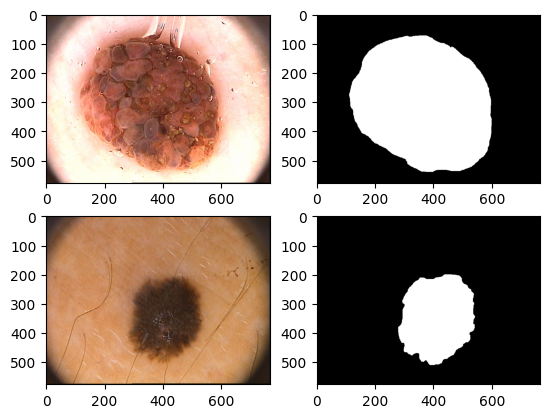

In [28]:
from dataloader import *
from PIL import Image
x_train, x_test, y_train_mask, y_test_mask = load_ph2_dataset()

#inline display of images in jupyter notebook
# show bmp image 0 in subplot of all 4
import matplotlib.pyplot as plt
plt.subplot(2,2,1)
plt.imshow(Image.open(x_train[0]))
plt.subplot(2,2,2)
plt.imshow(Image.open(y_train_mask[0]))
plt.subplot(2,2,3)
plt.imshow(Image.open(x_test[0]))
plt.subplot(2,2,4)
plt.imshow(Image.open(y_test_mask[0]))
plt.show()  

In [56]:
#image to numpy
Image.open(y_test_mask[0])
print(np.array(Image.open(y_test_mask[0]).convert('L')))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


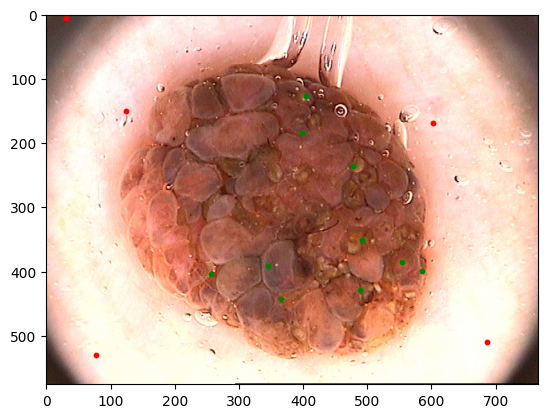

In [69]:
import numpy as np
# take a list of mask paths and return two numpy arrays of shape (num_points, 2) each containing the (x, y) coordinates of points sampled from black and white regions of the mask respectively.
def mask_to_points(mask_path, correct_points=10, incorrect_points=5):
    mask = np.array(Image.open(mask_path).convert('L'))
    ys, xs = np.where(mask > 128)  # Get coordinates of white pixels
    # get coordinates of black pixels
    yn, xn = np.where(mask <= 128)  # Get coordinates of black pixels
    if len(xs) == 0 or len(ys) == 0:
        return np.array([]), np.array([])  # No white pixels found
    # Randomly select points from white pixels
    num_white_points = correct_points
    white_indices = np.random.choice(len(xs), num_white_points, replace=False)
    # Randomly select points from black pixels
    num_black_points = incorrect_points 
    num_black_points = min(num_black_points, len(xn))
    black_indices = np.random.choice(len(xn), num_black_points, replace=False)
    # Combine the selected points
    incorrect_points = np.array(list(zip(xn[black_indices], yn[black_indices])))
    correct_points = np.array(list(zip(xs[white_indices], ys[white_indices])))
    
    return correct_points, incorrect_points

# Example usage
correct, incorrect = mask_to_points(y_train_mask[0], correct_points=10, incorrect_points=5)


# display the points on the original image
img = Image.open(x_train[0])
plt.imshow(img)
# plot white points in green
if len(correct) > 0:
    plt.scatter(correct[:,0], correct[:,1], c='green', s=10)
# plot black points in red
if len(incorrect) > 0:
    plt.scatter(incorrect[:,0], incorrect[:,1], c='red', s=10)
plt.show()